In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]
    
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
outcomes = km.fit_predict(X_train)

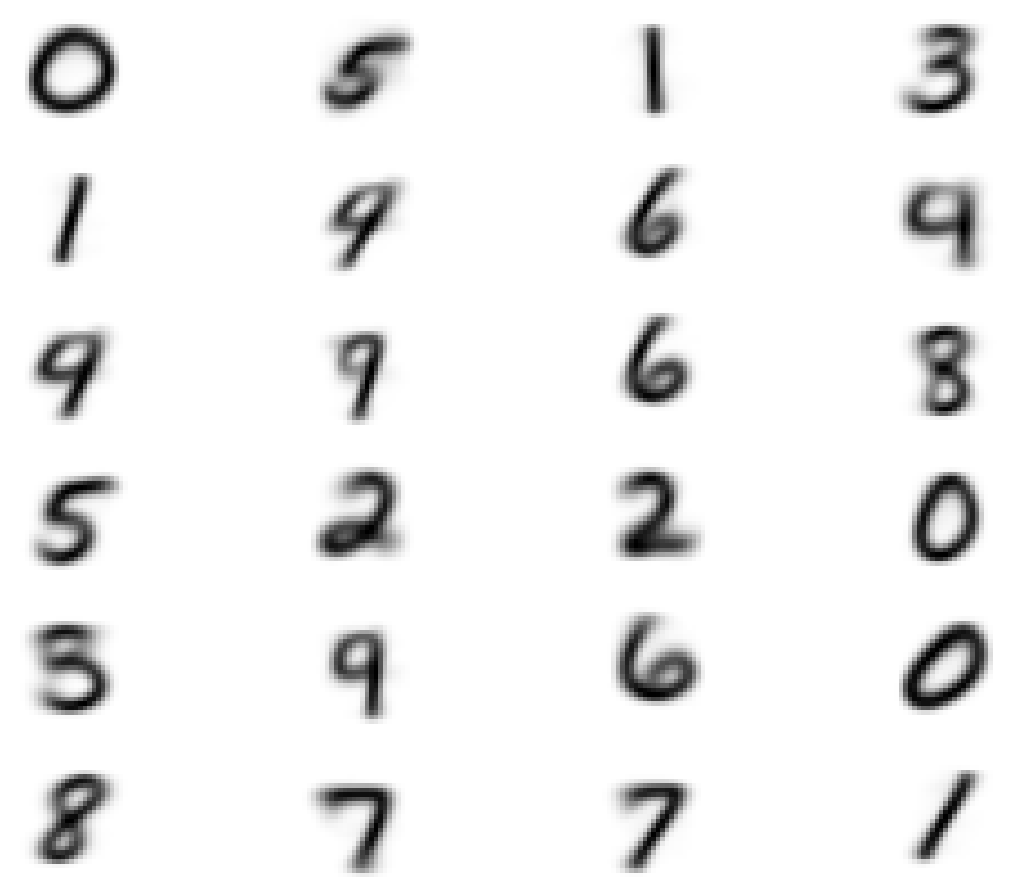

In [43]:
import matplotlib.pyplot as plt
rows = 6
columns = 4
km = KMeans(n_clusters=rows*columns)
outcomes = km.fit_predict(X_train)
fig = plt.figure(figsize=(20,16))
X_train_list = [ list(x) for x in X_train.values]

for i in range(rows):
    for j in range(columns):
        index = j + columns*i
#         if index >= 10:
#             break
        ax = fig.add_subplot(rows,columns,1+index)
        plt.imshow(km.cluster_centers_[index].reshape(28,28),cmap=plt.get_cmap('gray_r'))
        plt.axis('off')
plt.savefig(f'KMean{rows*columns}ClustersMNIST.png',bbox_inches='tight')
plt.show()

In [45]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=6*4, n_init=10)
gm.fit(X_train.iloc[:10000])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=24, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [46]:
densities = gm.score_samples(X_train)
density_threshold = np.percentile(densities, 4)
anomalies = X_train[densities < density_threshold]
anomalies.shape

(2240, 784)

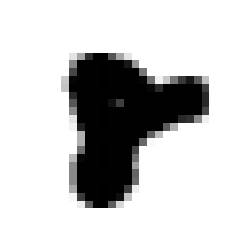

In [57]:
plt.imshow(anomalies.astype(int).values[4].reshape(28,28),cmap=plt.get_cmap('gray_r'))
plt.axis('off')
plt.savefig('Anomalies.png',bbox_inches='tight')
plt.show()

In [58]:
km.inertia_

124159487842.08002

In [62]:
import time
ks = []
inertia = []
for k in range(1,101,10):
    print(k)
    start = time.time()
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    inertia.append(km.inertia_)
    ks.append(k)
    print('Took:',str(round(time.time()-start,1))+'s')

1
Took: 13.7s
11
Took: 134.3s
21
Took: 175.1s
31
Took: 278.2s
41
Took: 318.4s
51
Took: 315.6s
61
Took: 344.4s
71
Took: 360.2s
81
Took: 392.9s
91
Took: 406.3s


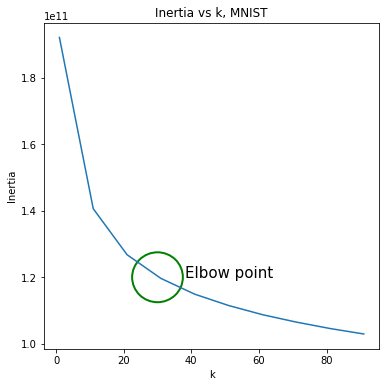

In [99]:
from matplotlib.patches import Ellipse
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(ks,inertia)
plt.title('Inertia vs k, MNIST')
plt.xlabel('k')
plt.ylabel('Inertia')
el = Ellipse(xy=(30,1.2e11), width=15, height=.15e11, angle=0,fill=None,edgecolor='green',linewidth=2)
ax.add_artist(el)
plt.text(x=38,y=1.2e11,s='Elbow point',fontsize=15)
plt.savefig('InertiaKMNIST.png',bbox_inches='tight')
plt.show()

In [67]:
from sklearn.datasets import load_iris
data_i = load_iris()

In [69]:
X_i, y_i = data_i['data'], data_i['target']

In [72]:
ks_i = []
inertia_i = []
for k in range(1,11,1):
    km = KMeans(n_clusters=k)
    km.fit(X_i)
    inertia_i.append(km.inertia_)
    ks_i.append(k)

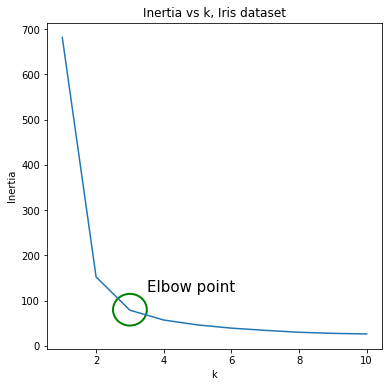

In [92]:
from matplotlib.patches import Ellipse
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(ks_i,inertia_i)
plt.title('Inertia vs k, Iris dataset')
plt.xlabel('k')
plt.ylabel('Inertia')
el = Ellipse(xy=(3,80), width=1, height=70, angle=0,fill=None,edgecolor='green',linewidth=2)
ax.add_artist(el)
plt.text(x=3.5,y=120,s='Elbow point',fontsize=15)
plt.savefig('inertiaKIris.png',bbox_inches='tight')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972866


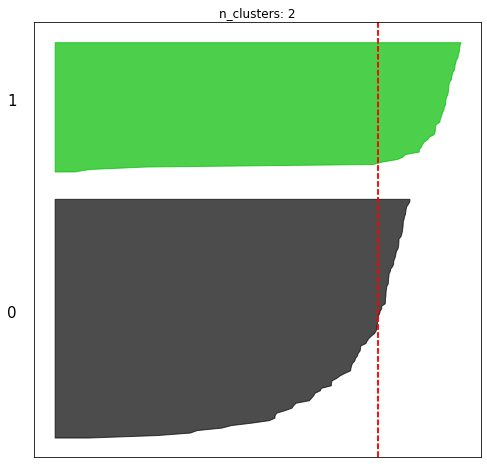

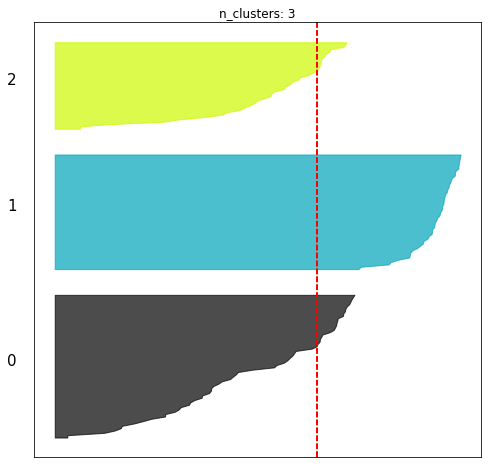

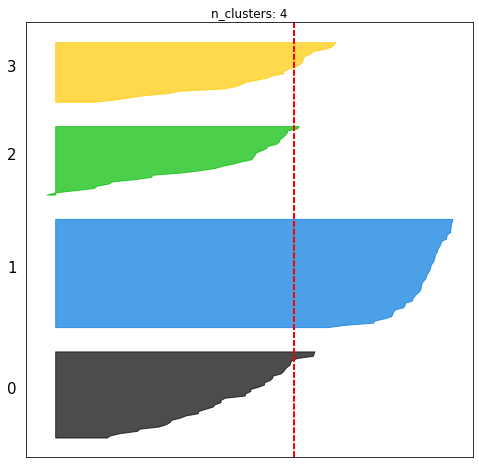

In [115]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in [2,3,4]:
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(111)
#     n_clusters = 3
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_i)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_i, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_i, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i), fontsize=15)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f'n_clusters: {n_clusters}')
        plt.xticks([])
        plt.yticks([])
    plt.savefig(f'irisNClusters{n_clusters}.png',bbox_inches='tight')

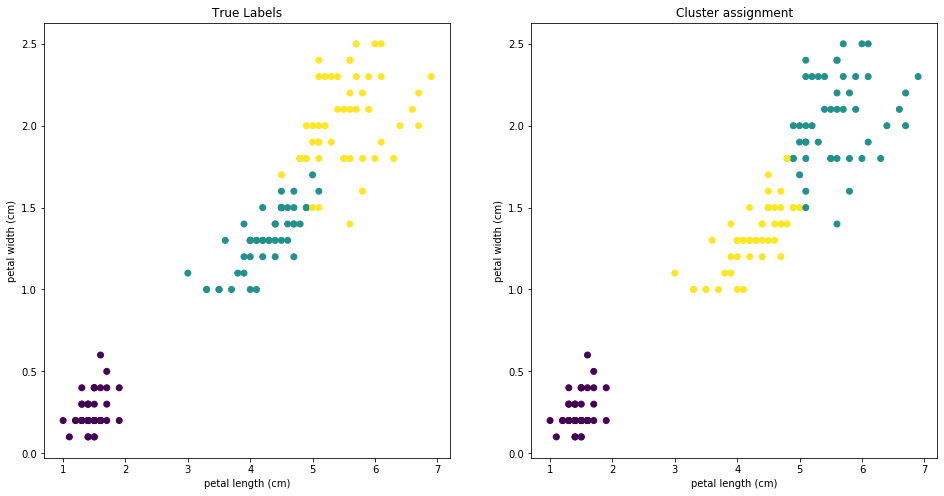

In [136]:
clusterer = KMeans(n_clusters=3, random_state=0)
cluster_labels = clusterer.fit_predict(X_i[:,2:])
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121)
plt.scatter(X_i[:,2],X_i[:,3],c=y_i)
plt.xlabel(data_i['feature_names'][2])
plt.ylabel(data_i['feature_names'][3])
plt.title('True Labels')
ax = fig.add_subplot(122)
plt.scatter(X_i[:,2],X_i[:,3],c=cluster_labels)
plt.xlabel(data_i['feature_names'][2])
plt.ylabel(data_i['feature_names'][3])
plt.title('Cluster assignment')
plt.savefig('irisClusterAssignment.png',bbox_inches='tight')
plt.show()

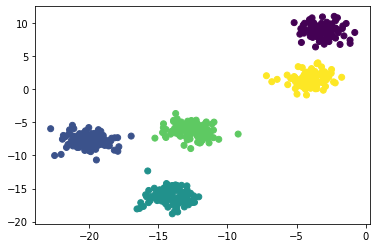

In [124]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-20.0, 20.0),
                  shuffle=True,
                  random_state=1)
plt.scatter(X[:,0],X[:,1],c=y)

For n_clusters = 2 The average silhouette_score is : 0.6916589694753251
For n_clusters = 4 The average silhouette_score is : 0.7377991228235891
For n_clusters = 5 The average silhouette_score is : 0.7797177053267453
For n_clusters = 6 The average silhouette_score is : 0.6908451172813334
For n_clusters = 7 The average silhouette_score is : 0.6022884452977223


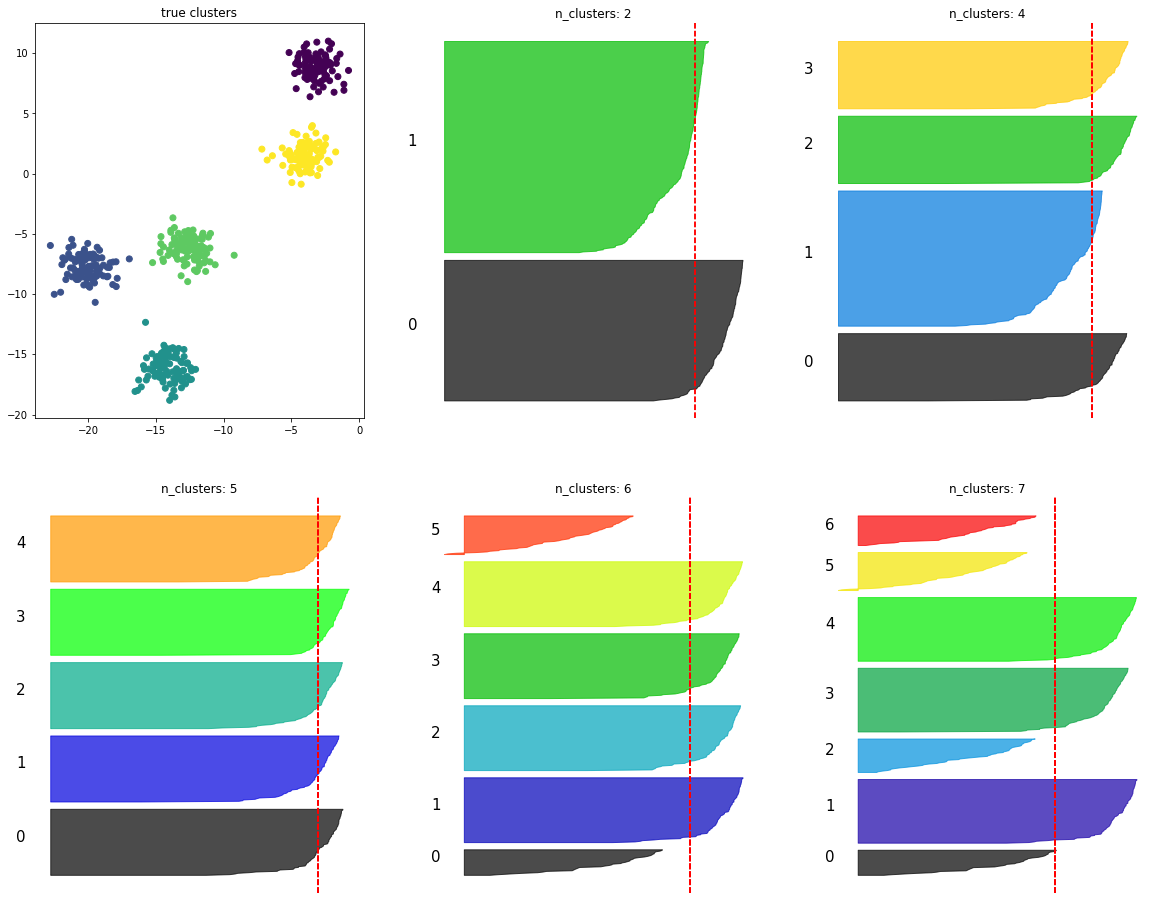

In [130]:
fig = plt.figure(figsize=(20,16))
k = 0
ax1 = fig.add_subplot(2,3,k+1)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('true clusters')
for n_clusters in [2,4,5,6,7]:
    k += 1
    ax1 = fig.add_subplot(2,3,k+1)
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i), fontsize=15)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title(f'n_clusters: {n_clusters}')
        plt.xticks([])
        plt.yticks([])
    plt.axis('off')
plt.savefig(f'blobs5Clusters.png',bbox_inches='tight')